In [40]:
from matplotlib import pyplot
import numpy as np
import struct
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from hardposit import from_double, from_bits
import math
pyplot.rcParams['figure.figsize'] = [20, 10]



In [ ]:
# COMPARISON DATA DIVISION with PACoGen



In [81]:
# DATA from synthesis on spartan7

sp7data = {
    'ps'    : [3,3,3,3,3,3,3],
    'word'  : [32,64,64,64,64,64,64],
    'float' : [0,64,64,32,0,0,0],
    'N'     : [8,8,16,8,8,8,8],
    'es'    : [2,2,2,2,2,1,0],
    'power' : [0.028,0.029,0.043,0.029,0.028,0.028,0.029],
    'dyn_p' : [41,44,62,44,41,42,44],
    'lut_a' : [419,459,1564,453,419,422,429],
    'lut_p' : [11.7,12.24,41.7,12.1,11.2,11.25,11.44],
    'ff_a'  : [156,247,442,245,156,150,141],
    'ff_p'  : [2.08,3.29,5.89,3.27,2.08,2.0,1.88],
    'delay' : [12,12,18,12,12,12,12]
}


d = pd.DataFrame(data = sp7data)

d['dyn_a'] = d.power * d.dyn_p/100

d.index = pd.MultiIndex.from_arrays(d[['ps','N','es','word','float']].values.T)
d = d.sort_values(by=['ps','N','es','word','float'])

d

ps  word  float   N  es  power  dyn_p  lut_a  lut_p  ff_a  ff_p  \
3 8  0 64 0    3    64      0   8   0  0.029     44    429  11.44   141  1.88   
     1 64 0    3    64      0   8   1  0.028     42    422  11.25   150  2.00   
     2 32 0    3    32      0   8   2  0.028     41    419  11.70   156  2.08   
       64 0    3    64      0   8   2  0.028     41    419  11.20   156  2.08   
          32   3    64     32   8   2  0.029     44    453  12.10   245  3.27   
          64   3    64     64   8   2  0.029     44    459  12.24   247  3.29   
  16 2 64 64   3    64     64  16   2  0.043     62   1564  41.70   442  5.89   

              delay    dyn_a  
3 8  0 64 0      12  0.01276  
     1 64 0      12  0.01176  
     2 32 0      12  0.01148  
       64 0      12  0.01148  
          32     12  0.01276  
          64     12  0.01276  
  16 2 64 64     18  0.02666

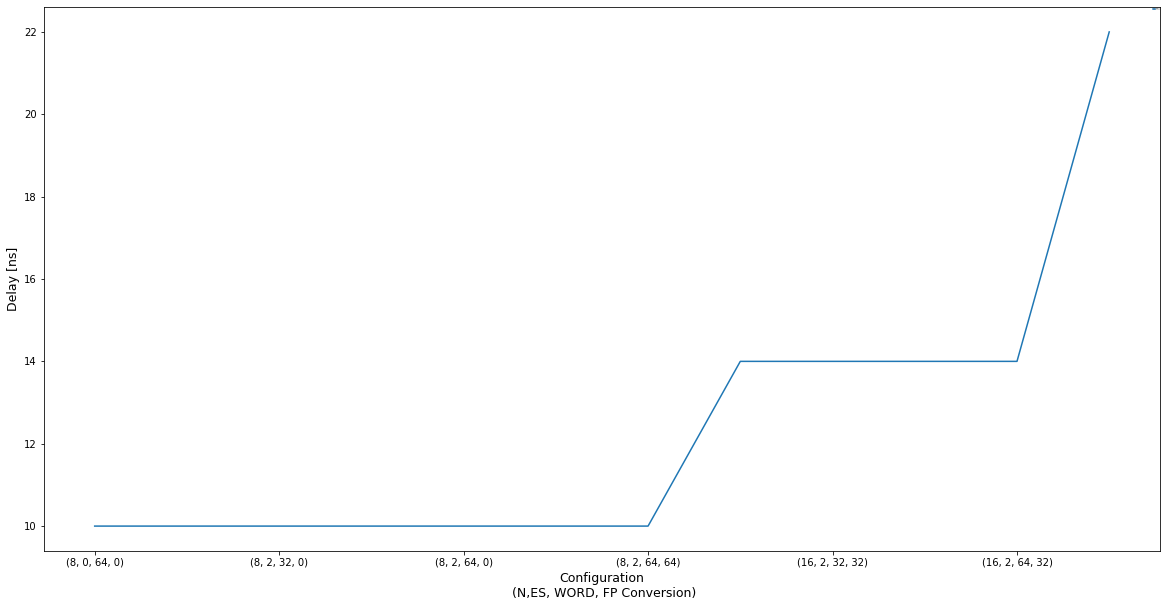

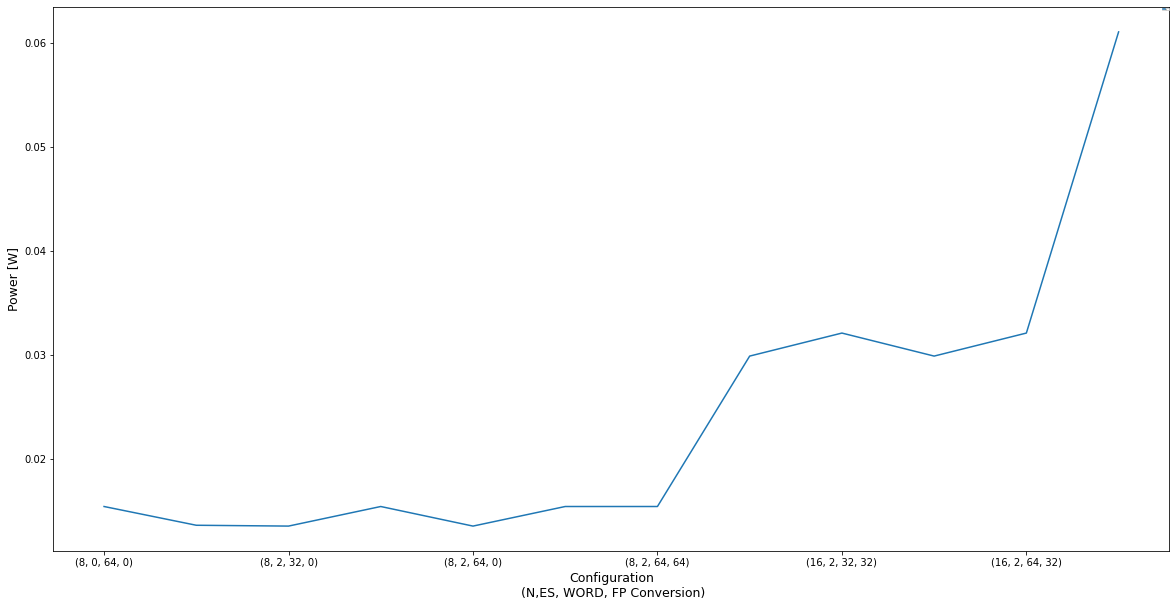

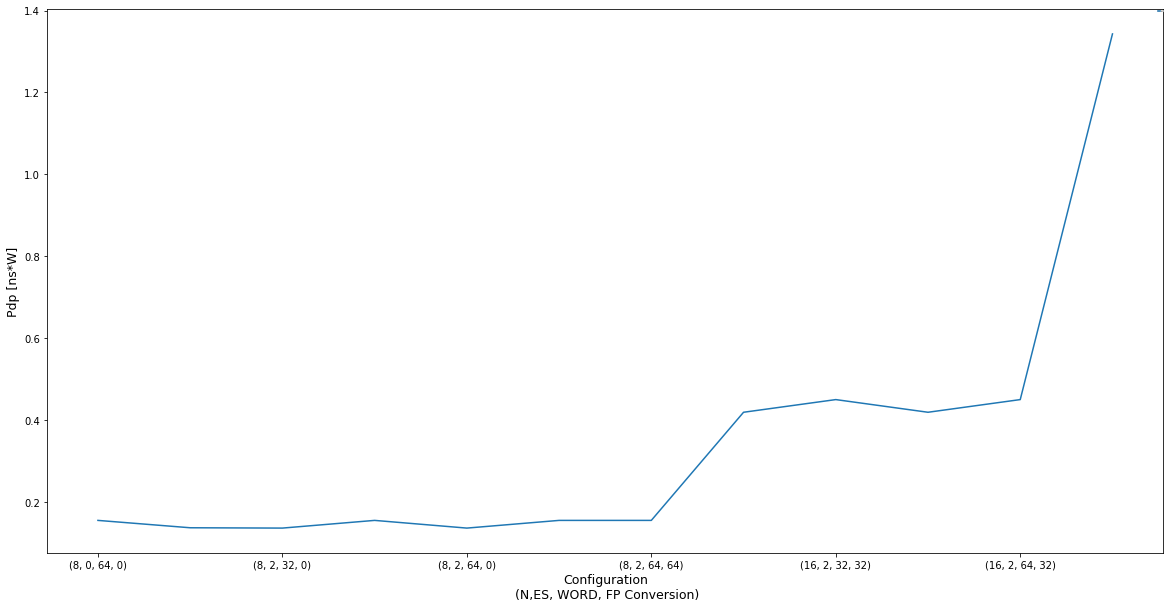

In [214]:
# DATA from synthesis on genesys 2

g2data = {
    'word'  : [32,32,32,32,32,64,64,64,64,64,64,64],
    'float' : [0,0,0,32,32,0,0,0,0,32,32,64],
    'N'     : [8,16,32,8,16,8,8,8,16,8,16,8],
    'es'    : [2,2,2,2,2,2,1,0,2,2,2,2],
    'power' : [0.170,0.187,0.218,0.172,0.189,0.170,0.171,0.172,0.187,0.172,0.189,0.172],
    'dyn_p' : [8,16,28,9,17,8,8,9,16,9,17,9],
    'lut_a' : [419,1411,3296,451,1467,418,422,429,1411,453,1432,459],
    'lut_p' : [0.21,0.69,1.62,0.22,0.72,0.21,0.21,0.21,0.69,0.22,0.70,0.22],
    'ff_a'  : [156,251,518,245,365,156,150,141,251,245,365,247],
    'ff_p'  : [0.48,1.31,5.71,0.48,1.31,0.48,0.48,0.48,1.31,0.06,0.09,0.06],
    'delay' : [10,14,22,10,14,10,10,10,14,10,14,10],
    'wns'   : [0.932,0.045,0.552,0.932,0.045,0.932,0.943,0.778,0.045,0.932,0.045,0.932]
}

d = pd.DataFrame(data = g2data)

d['dyn_a'] = d.dyn_p * d.power/100
d['pdp'] = d.delay * d.dyn_a



d.index = pd.MultiIndex.from_arrays(d[['N','es','word','float']].values.T)
d = d.sort_values(by=['N','es','word','float'])

plt = d.plot(y='delay')
plt.legend(fontsize='0')
plt.set_xlabel('Configuration\n (N,ES, WORD, FP Conversion)',fontsize=12.5)
plt.set_ylabel('Delay [ns]',fontsize=12.5)

plt = d.plot(y='dyn_a')
plt.legend(fontsize='0')
plt.set_xlabel('Configuration\n (N,ES, WORD, FP Conversion)',fontsize=12.5)
plt.set_ylabel('Power [W]',fontsize=12.5);

plt = d.plot(y='pdp')
plt.legend(fontsize='0')
plt.set_xlabel('Configuration\n (N,ES, WORD, FP Conversion)',fontsize=12.5)
plt.set_ylabel('Pdp [ns*W]',fontsize=12.5);


In [ ]:
# DATA from synthesis on ultrascale+